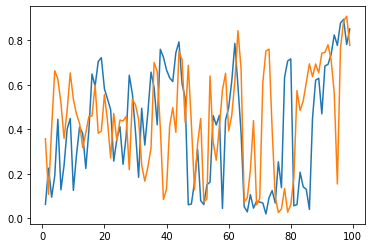

In [18]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import pandas as pd

ddql = pd.read_csv("DDQL_5phut.csv").values
dql = pd.read_csv("DQL_5phut.csv").values

totalddql = ddql[:,0].reshape([-1,1])
meanddql = ddql[:,1].reshape([-1,1])

totaldql = dql[0:99,0].reshape([-1,1])
meandql = dql[0:99,1].reshape([-1,1])
x = [i + 1 for i in range(99)]
x = np.array(x).reshape([-1,1])

#print (meanddql) 
plt.plot(x, meanddql)
plt.plot(x, meandql)

plt.show()

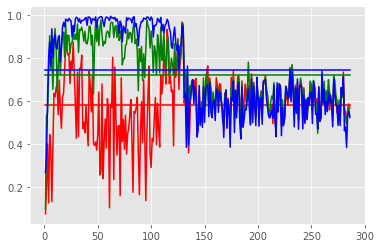

In [29]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd

data1 = pd.read_csv("DQL_5phut_1.csv").values[:, 1]
data2 = pd.read_csv("DQL_5phut_2.csv").values[:, 1]
data3 = pd.read_csv("DQL_5phut_3.csv").values[:, 1]
data4 = pd.read_csv("DQL_5phut_4.csv").values[:, 1]
data5 = pd.read_csv("DQL_5phut_5.csv").values[:, 1]

number = [i + 1 for i in range(data1.shape[0])]
plt.tight_layout()
plt.plot(number, data1, color="red")
plt.plot(number, [np.average(data1)] * data1.shape[0], color="red")
plt.plot(number, data2, color="green")
plt.plot(number, [np.average(data2)] * data1.shape[0], color="green")
plt.plot(number, data3, color="blue")
plt.plot(number, [np.average(data3)] * data1.shape[0], color="blue")
#plt.plot(number, data4)
#plt.plot(number, data5)

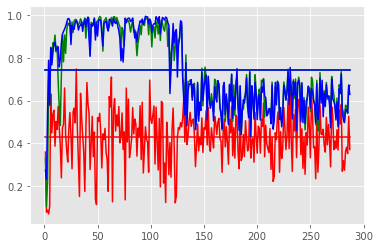

In [30]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd

data1 = pd.read_csv("DDQL_5phut_1.csv").values[:, 1]
data2 = pd.read_csv("DDQL_5phut_2.csv").values[:, 1]
data3 = pd.read_csv("DDQL_5phut_3.csv").values[:, 1]

number = [i + 1 for i in range(data1.shape[0])]
plt.tight_layout()
plt.plot(number, data1, color="red")
plt.plot(number, [np.average(data1)] * data1.shape[0], color="red")
plt.plot(number, data2, color="green")
plt.plot(number, [np.average(data2)] * data1.shape[0], color="green")
plt.plot(number, data3, color="blue")
plt.plot(number, [np.average(data3)] * data1.shape[0], color="blue")


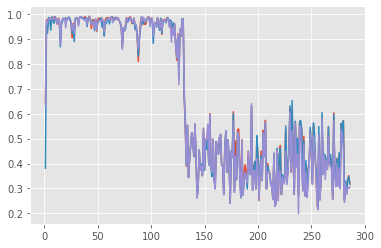

In [17]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd

data1 = pd.read_csv("FDQO_5phut_1.csv").values[:, 1]
data2 = pd.read_csv("FDQO_5phut_2.csv").values[:, 1]
data3 = pd.read_csv("FDQO_5phut_3.csv").values[:, 1]

number = [i + 1 for i in range(data1.shape[0])]
plt.tight_layout()
plt.plot(number, data1)
plt.plot(number, data2)
plt.plot(number, data3)


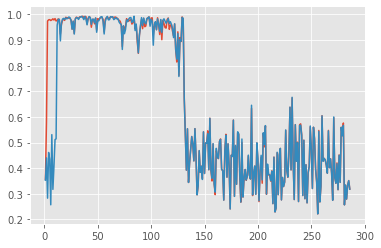

In [32]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd

data1 = pd.read_csv("FDQO_5phut_6.csv").values[:, 1]
data2 = pd.read_csv("FDQO_5phut_7.csv").values[:, 1]

number = [i + 1 for i in range(data1.shape[0])]
plt.tight_layout()
plt.plot(number, data1)
plt.plot(number, data2)
